In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fastparquet

In [3]:
trades = pd.read_parquet("clean_trades.parquet", engine = 'fastparquet')
df = pd.read_csv("baseline2.csv",index_col='Unnamed: 0')

In [4]:
df

,stock_id,time_id,sigma,target,size,spread,time_diff,log_time_diff,timefunc
0,0,5,0.004499,0.004136,3179,7.922559,15,2.708050,0.310975
1,0,11,0.001204,0.001445,1287,4.118409,23,3.135494,0.723982
2,0,16,0.002369,0.002168,2161,6.476585,35,3.555348,0.971598
3,0,31,0.002574,0.002195,1962,7.627233,28,3.332205,0.849035
4,0,62,0.001894,0.001747,1791,4.302926,25,3.218876,0.779443
...,...,...,...,...,...,...,...,...,...
428905,126,32751,0.003691,0.003461,2570,8.478007,13,2.564949,0.309585
428906,126,32753,0.004104,0.003113,2085,6.312181,22,3.091042,0.788629
428907,126,32758,0.003118,0.004070,3740,7.187954,24,3.178054,0.841990
428908,126,32763,0.003661,0.003357,9389,5.191397,4,1.386294,1.040582


In [5]:
trades.head()

,time_id,seconds_in_bucket,price,size,order_count,stock_id,bid_price1,ask_price1,bid_price2,ask_price2,...,bid_price2_before,ask_price2_before,bid_size1_before,ask_size1_before,bid_size2_before,ask_size2_before,time_diff,trade,mid,spread
index,,,,,,,,,,,,,,,,,,,,,
0,5,21,1.002301,326,12,0,1.001422,1.002818,1.001370,1.002922,...,1.001370,1.002405,3,126,2,100,2,1,1.002120,13.933441
1,5,46,1.002778,128,4,0,1.002818,1.003232,1.002301,1.003801,...,1.001422,1.002922,83,28,3,100,2,0,1.003025,4.125274
2,5,50,1.002818,55,1,0,1.002353,1.003025,1.002301,1.003232,...,1.002353,1.003749,55,101,103,100,2,-1,1.002689,6.705371
3,5,57,1.003155,121,5,0,1.002508,1.003646,1.002457,1.003749,...,1.002301,1.003181,3,20,100,100,2,1,1.003077,11.342434
4,5,68,1.003646,4,1,0,1.002870,1.003749,1.002818,1.003801,...,1.002767,1.003749,11,4,14,200,5,1,1.003310,8.762683


In [6]:
trades['product_shift'] = trades['size']*trades['trade']
trades['product_shift_abs'] = np.abs(trades['size']*trades['trade'])

In [7]:
gb = trades.groupby(['stock_id', 'time_id'])
df = df.merge(gb.agg({'product_shift':'mean','product_shift_abs':'sum'}).reset_index())
df['shift_ratio']= df.product_shift_abs/df['size']

<Axes: xlabel='product_shift', ylabel='target'>

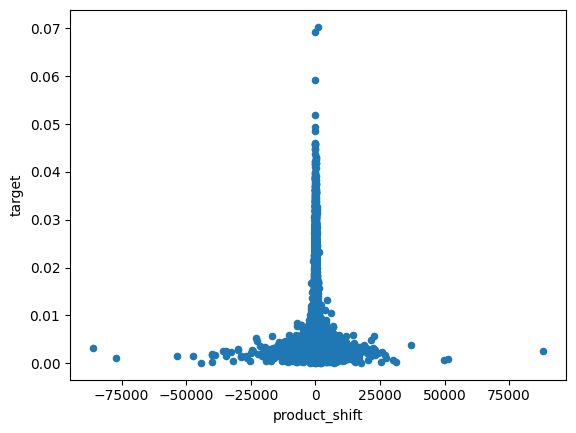

In [13]:
df.plot.scatter(x='product_shift',y='target')

<Axes: xlabel='shift_ratio', ylabel='target'>

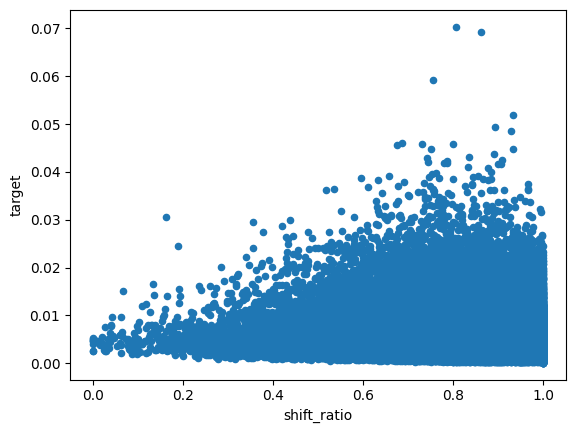

In [14]:
df.plot.scatter(x='shift_ratio',y='target')

In [15]:
df.corr().target

stock_id            -0.021662
time_id             -0.010341
sigma                0.873780
target               1.000000
size                 0.036413
spread               0.753375
time_diff            0.031866
log_time_diff        0.065225
timefunc             0.064945
product_shift        0.000044
product_shift_abs    0.022427
shift_ratio         -0.233866
Name: target, dtype: float64